In [1]:
# Circulation and heat transport regimes 
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import gsw
import cmocean

In [2]:
def along_fjord_regime(datapath, case_id, time):
    #/Users/weiyangbao/Documents/Model_outputs/
    #/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase
    file0 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')
    # removed duplicated data caused by model restart
    file = file0.isel(T=~file0.get_index("T").duplicated())
    state = file.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45)) # T=range(t0,tn)
    
    X = state.X.data 
    x_dist = X / 1000
    depth = state.Z.data
    pres = gsw.p_from_z(depth, 55)
    pt = state.Temp.data[time,:,:,:].mean(1)
    s = state.S.data[time,:,:,:].mean(1)
    p = np.tile(pres,[len(X),1]).T
    rhoA = gsw.rho(s, pt, p) - 1000
    
    # Along-fjord velocity
    u0 = state.U.data[time,:,:,:] # dims = T, Z, Y, Xp1
    u = (u0[:, :, 1:].mean(1) + u0[:, :, :-1].mean(1)) / 2
    
    # Vetical velocity
    W0 = state.W.data
    bt = np.zeros((W0.shape[0],1,W0.shape[2],W0.shape[3])) # Add vertical velocity (0 m/s) at the bottom
    W = np.concatenate((W0, bt), axis=1)
    wzy = (W[:,1:,:,:] + W[:,:-1,:,:]) / 2
    w = wzy[time,:,:,:].mean(1)
    
    #pt0 = file.Temp.data.mean(2)[1,:,:260]
    pt0 = state.Temp.data.mean(2)[0,:,:]
    mask = (pt0 == 0)
    pt[mask] = np.nan
    s[mask] = np.nan
    rhoA[mask] = np.nan
    u[mask] = np.nan
    w[mask] = np.nan
        
    return (x_dist, depth, pt, rhoA, u, w)

In [3]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_maxhs'
    
x1, z1, pt1, rho1, u1, w1 = along_fjord_regime(path1, 5, -1) # 0.5N2, Regime1
x2, z2, pt2, rho2, u2, w2 = along_fjord_regime(path2, 4, 16) # 1N2, hs/hf=0.12, Regime2
x3, z3, pt3, rho3, u3, w3 = along_fjord_regime(path1, 1, 16) # 4N2, Regime3
x4, z4, pt4, rho4, u4, w4 = along_fjord_regime(path1, 1, -1) # 4N2, Regime4

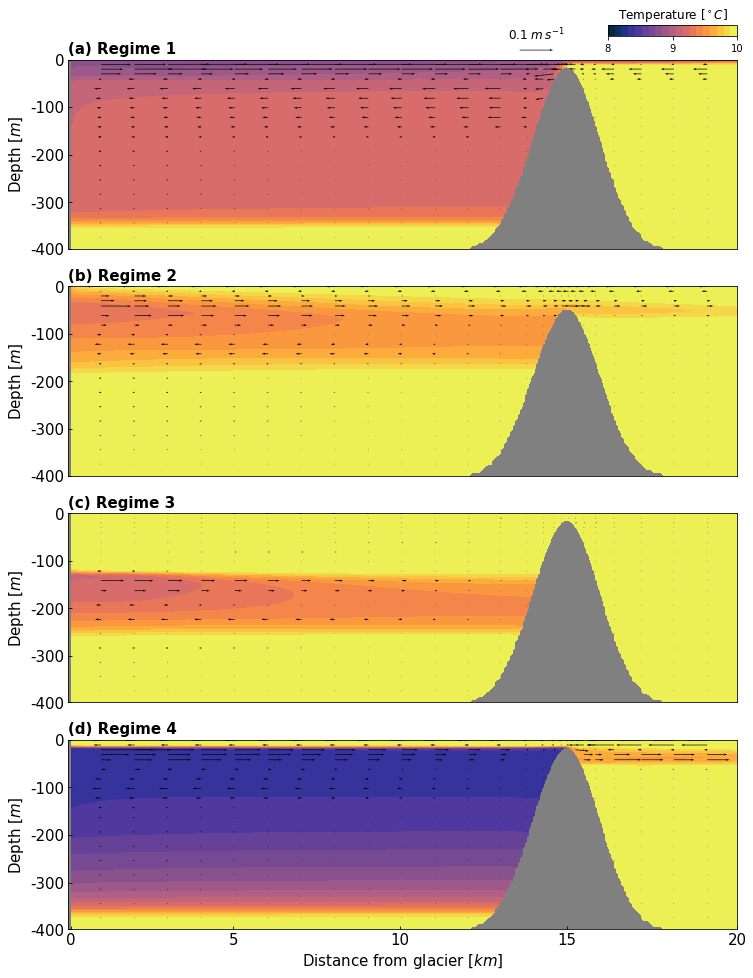

In [4]:
# Make plot for three different sill depths (New Runs)
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(12,16))

cm = np.linspace(8,10,20) # Contour range
cmap = cmocean.cm.thermal
#cmap = 'plasma_r'

x_dist = x1
depth = z1
im1 = ax1.contourf(x1, z1, pt1, cm, cmap=cmap) 
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax1.set_facecolor('grey')
ax1.tick_params(direction='in', labelsize=15)


cbaxes = fig1.add_axes([0.75, 0.9, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8, 9, 10])
cbar.ax.set_title(r'Temperature [$^\circ C$]', size=12)


# CS1 = ax1.contour(x1,z1,rho1,5, colors='k', linewidths=.5)
# plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)
ax1.xaxis.set_visible(False)
ax1.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax1.set_yticklabels(["0","-100","-200","-300","-400"])
ax1.set_ylabel('Depth [$m$]', size=15)
ax1.set_title(r'(a) Regime 1', loc='left', size=15, weight='bold')


im2 = ax2.contourf(x2, z2, pt2, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax2.set_facecolor('grey')
ax2.tick_params(direction='in', labelsize=15)

# CS2 = ax2.contour(x2,z2,rho2, 5, colors='k', linewidths=.5)
# plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)
ax2.xaxis.set_visible(False)
ax2.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax2.set_yticklabels(["0","-100","-200","-300","-400"])
ax2.set_ylabel('Depth [$m$]', size=15)
ax2.set_title(r'(b) Regime 2', loc='left', size=15, weight='bold')




im3 = ax3.contourf(x3, z3, pt3, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax3.set_facecolor('grey')
ax3.tick_params(direction='in', labelsize=15)


# CS3 = ax3.contour(x3,z3,rho3,5, colors='k', linewidths=.5)
# plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)
ax3.xaxis.set_visible(False)
ax3.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax3.set_yticklabels(["0","-100","-200","-300","-400"])
ax3.set_ylabel('Depth [$m$]', size=15)
ax3.set_title(r'(c) Regime 3', loc='left', size=15, weight='bold')



im4 = ax4.contourf(x4, z4, pt4, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax4.set_facecolor('grey')
ax4.tick_params(direction='in', labelsize=15)


# CS4 = ax4.contour(x4,z4,rho4,5, colors='k', linewidths=.5)
# plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
ax4.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax4.set_yticklabels(["0","-100","-200","-300","-400"])
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_title(r'(d) Regime 4', loc='left', size=15, weight='bold')
ax4.set_xticks([x_dist[1], 5, 10, 15, x_dist[-1]])
ax4.set_xticklabels(["0","5","10","15","20"])
ax4.set_xlabel('Distance from glacier [$km$]', size=15)




sl, sr = 140, 220 # quiver over sill range

u1_sill = u1[:,sl:sr]
w1_sill = w1[:,sl:sr]
x1_sill = x1[sl:sr]

nx, nz = 10, 5

Q_1s = ax1.quiver(x1_sill[::nx],z1[::nz],u1_sill[::nz,::nx], w1_sill[::nz,::nx],scale=6, width=0.001, color='k')
u1[:,sl:sr] = 'nan'
w1[:,sl:sr] = 'nan'
Q_1 = ax1.quiver(x1[::nx],z1[::nz],u1[::nz,::nx], w1[::nz,::nx],scale=2, width=0.001, color='k')
ax1.quiverkey(Q_1, 0.7, 1.05, 0.1, r'0.1 $m\,s^{-1}$', fontproperties={'size':12}, coordinates='axes')


# u2_sill = u2[:,sl:sr]
# w2_sill = w2[:,sl:sr]
# x2_sill = x2[sl:sr]
# Q_2s = ax2.quiver(x2_sill[::nx],z2[::nz],u2_sill[::nz,::nx], w2_sill[::nz,::nx],scale=6, width=0.001, color='k')
# u2[:,sl:sr] = 'nan'
# w2[:,sl:sr] = 'nan'
Q_2 = ax2.quiver(x2[::nx],z2[::nz],u2[::nz,::nx], w2[::nz,::nx],scale=2, width=0.001, color='k')


u3_sill = u3[:,sl:sr]
w3_sill = w3[:,sl:sr]
x3_sill = x3[sl:sr]
Q_3s = ax3.quiver(x3_sill[::nx],z3[::nz],u3_sill[::nz,::nx], w3_sill[::nz,::nx],scale=6, width=0.001, color='k')

u3[:,sl:sr] = 'nan'
w3[:,sl:sr] = 'nan'
u3[:,178:] = u3[:,178:] / 10
Q_3 = ax3.quiver(x3[::nx],z3[::nz],u3[::nz,::nx], w3[::nz,::nx],scale=2, width=0.001, color='k')


u4_sill = u4[:,sl:sr]
w4_sill = w4[:,sl:sr]
x4_sill = x4[sl:sr]
Q_4s = ax4.quiver(x4_sill[::nx],z4[::nz],u4_sill[::nz,::nx], w4_sill[::nz,::nx],scale=6, width=0.001, color='k')

u4[:,sl:sr] = 'nan'
w4[:,sl:sr] = 'nan'
Q_4 = ax4.quiver(x4[::nx],z4[::nz],u4[::nz,::nx], w4[::nz,::nx],scale=2, width=0.001, color='k')

plt.show()

In [5]:
u3[:,220]

array([-2.5400051e-04, -2.1791036e-04, -1.3721055e-04, -2.9875513e-05,
        1.0821458e-04,  2.4948944e-04,  4.5441138e-04,  8.0081739e-04,
        1.1295804e-03,  1.2153573e-03,  1.1764745e-03,  9.4766554e-04,
        5.8323669e-04,  2.4050365e-04,  4.6209370e-05, -3.0544477e-05,
       -4.1355292e-05, -2.7267470e-05, -8.8750148e-06,  6.3405328e-06,
        1.9128556e-05,  1.9628520e-05,  1.1262628e-05,  2.1366955e-06,
       -4.6766704e-06, -9.1323309e-06, -1.1756980e-05, -1.2268079e-05,
       -1.2009652e-05, -9.8755245e-06, -6.1009800e-06, -3.3505653e-06,
       -7.5006756e-09,  2.8101829e-06,  3.9388324e-06,  4.5353313e-06,
        3.6511956e-06,  2.7566607e-06,  1.3647568e-06,  5.3243105e-07,
       -3.7258354e-07, -6.7720788e-07, -6.3953684e-07,  2.8827634e-07,
        5.2606032e-07,  7.6389006e-07,  1.1822895e-06,  2.0581265e-06,
        6.1899891e-07,  5.4381860e-07,  7.2019304e-07, -5.7033242e-07,
        1.9842973e-07, -1.2360122e-06,  3.0242926e-08, -1.2385830e-06,
      

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + 'Regimes_Snapshots.png', dpi=300, bbox_inches='tight') 